In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive

/content/gdrive


In [ ]:
cd MyDrive

/content/gdrive/MyDrive


In [ ]:
cd Colab datasets

/content/gdrive/MyDrive/Colab datasets


In [ ]:
# importing necessary libraries
import os

from nltk.corpus import stopwords
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplot

from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import math

In [ ]:
Data = pd.read_csv("multilable_dataset.csv")
Data.head()

,commentText,facts,hypocrisy,warning,affiliation,denouncing,humor,positive_tone,hostile_language
0,kind god hates people curses kind people belie...,0,1,0,0,0,0,1,0
1,question comment racist jews smartest group pe...,0,0,0,0,0,0,1,0
2,israel fail nothing new israel rebellious nati...,0,0,0,0,0,0,1,0
3,god damned ignorant little prick doesnt know a...,0,0,0,0,0,0,0,1
4,shit may cooler police brutality people assumi...,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(Data, test_size=0.40, shuffle=True)
XTrain = train['commentText'].values
XTest = test['commentText'].values
 
labels=['facts', 'hypocrisy', 'warning', 'affiliation', 'denouncing', 'humor', 'positive_tone', 'hostile_language']
YTrain = train[labels]
YTest = test[labels]

In [ ]:
XTrain

array(['gets kids national twice gets beat story couple white bus mentioned forgotton black student murdered year school yet ago black',
       'send allah', 'hell world thats infested like people going', ...,
       'nasty fucking biiiitch', 'guess gay guys forum guess kirk hot',
       'wild natural lions person say dumbest goes gay honestly ever chimpanzees unnatural'],
      dtype=object)

In [ ]:
XTest

array(['long prat points ground cop cop cop', 'please get diabetes',
       'ignorant basterd', ...,
       'homosexuality probably behavior species world present study unnatural exhibit',
       'book longer idea homosexuality old leger talking fairy biblekirk call fact',
       'thats yes patent nothing apparent hate'], dtype=object)

In [ ]:
YTrain

,facts,hypocrisy,warning,affiliation,denouncing,humor,positive_tone,hostile_language
31387,0,1,0,0,1,0,0,0
3225,0,0,0,0,0,0,0,1
29037,0,0,1,0,0,0,0,1
1717,0,0,0,0,0,0,0,1
25268,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...
13131,1,0,0,0,0,0,0,0
12670,1,0,0,0,1,0,0,0
29786,0,0,0,0,0,0,0,1
16615,0,0,0,0,0,1,0,0


In [ ]:
YTest

,facts,hypocrisy,warning,affiliation,denouncing,humor,positive_tone,hostile_language
7774,0,0,0,0,0,1,0,0
2586,0,0,0,0,0,1,0,0
252,0,0,0,0,0,0,0,1
29512,0,1,0,0,0,0,0,0
33179,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
20964,0,1,0,0,0,0,0,0
34010,0,0,0,0,0,0,0,1
22826,1,1,0,0,0,0,0,0
15085,1,0,0,0,0,0,0,0


## **Word2Vec**

In [ ]:
import gensim
from gensim.models.word2vec import Word2Vec
LabeledSentence = gensim.models.doc2vec.LabeledSentence

In [ ]:
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

#  Reads text.txt file
f = open("text.txt", "w")
f.truncate(0)
for i in range(len(XTrain)):
  f.write(XTrain[i])
f.close()

sample = open("text.txt", "r")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")
  
data = []
  
# iterate through each sentence in the file
for i in sent_tokenize(f):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
model_w2v = gensim.models.Word2Vec(
            data,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=5, # Ignores all words with total frequency lower than 5.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 30, # no.of cores
            seed = 34) 

model_w2v.train(data, total_examples= len(XTrain), epochs=20)

(200000, 6442120)

In [ ]:
embeddings_index = {}
for w in model_w2v.wv.vocab.keys():
    embeddings_index[w] = model_w2v.wv[w]

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(XTrain)
sequences = tokenizer.texts_to_sequences(XTrain)

In [ ]:
for x in XTrain[:5, ]:
    print(x)

gets kids national twice gets beat story couple white bus mentioned forgotton black student murdered year school yet ago black
send allah
hell world thats infested like people going
stoned make laugh youre disappointment
society way people life valid peoples decisions respected dont hate cant respect straight need honestly may curiosity todays hate see guess reasons


In [ ]:
length = []
for x in XTrain:
    length.append(len(x.split()))
max(length)

977

In [ ]:
length = []
for x in XTest:
    length.append(len(x.split()))
max(length)

861

In [ ]:
XTrain_seq = pad_sequences(sequences, maxlen=980)
XTrain_seq[:5]

array([[   0,    0,    0, ...,  160,  350,    9],
       [   0,    0,    0, ...,    0,  642,   33],
       [   0,    0,    0, ...,    2,    1,   70],
       [   0,    0,    0, ...,  723,   80, 4195],
       [   0,    0,    0, ...,   27,  354,  748]], dtype=int32)

In [ ]:
sequences_Test = tokenizer.texts_to_sequences(XTest)
XTest_seq = pad_sequences(sequences_Test, maxlen=980)
XTest_seq[:5]

array([[    0,     0,     0, ...,   361,   361,   361],
       [    0,     0,     0, ...,   132,    13,  5600],
       [    0,     0,     0, ...,     0,   146, 10191],
       [    0,     0,     0, ...,    19,     5,   227],
       [    0,     0,     0, ...,  1180,    11,    34]], dtype=int32)

In [ ]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing import sequence
from keras import layers

In [ ]:
model = Sequential()
model.add(Embedding(100000, 200, input_length=980))
model.add(layers.LSTM(64,dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 980, 200)          20000000  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                67840     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 20,067,905
Trainable params: 20,067,905
Non-trainable params: 0
_________________________________________________________________


Facts

Epoch 1/5
644/644 [==============================] - 749s 1s/step - loss: 0.2753 - accuracy: 0.9020 - val_loss: 0.1485 - val_accuracy: 0.9539
Epoch 2/5
644/644 [==============================] - 736s 1s/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0804 - val_accuracy: 0.9743
Epoch 3/5
644/644 [==============================] - 737s 1s/step - loss: 0.0251 - accuracy: 0.9928 - val_loss: 0.0725 - val_accuracy: 0.9782
Epoch 4/5
644/644 [==============================] - 739s 1s/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0519 - val_accuracy: 0.9881
Epoch 5/5
644/644 [==============================] - 737s 1s/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0603 - val_accuracy: 0.9864

Final training loss 	 0.00892164558172226
Final training accuracy  0.9969895482063293 

430/430 [==============================] - 67s 156ms/step - loss: 0.0603 - accuracy: 0.9864

Testing loss  	 0.06032845377922058
Testing accuracy  0.9863801598548889


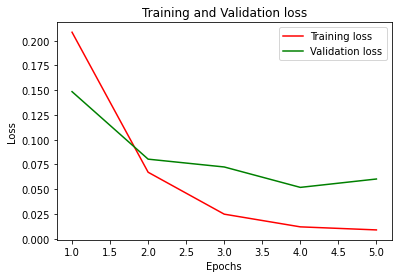

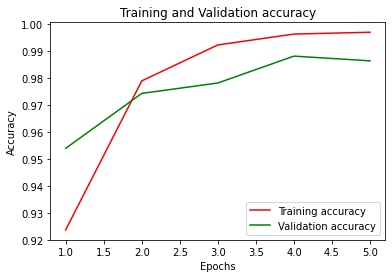

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12209
           1       0.98      0.90      0.94      1521

    accuracy                           0.99     13730
   macro avg       0.98      0.95      0.96     13730
weighted avg       0.99      0.99      0.99     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['facts'], epochs=5, validation_data=(XTest_seq, YTest['facts']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['facts'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)


# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['facts'], YPred))

Hypocrisy

Epoch 1/5
644/644 [==============================] - 737s 1s/step - loss: 0.3183 - accuracy: 0.8775 - val_loss: 0.1836 - val_accuracy: 0.9320
Epoch 2/5
644/644 [==============================] - 737s 1s/step - loss: 0.0975 - accuracy: 0.9658 - val_loss: 0.1125 - val_accuracy: 0.9616
Epoch 3/5
644/644 [==============================] - 737s 1s/step - loss: 0.0432 - accuracy: 0.9856 - val_loss: 0.0995 - val_accuracy: 0.9685
Epoch 4/5
644/644 [==============================] - 737s 1s/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0887 - val_accuracy: 0.9773
Epoch 5/5
644/644 [==============================] - 737s 1s/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0895 - val_accuracy: 0.9760

Final training loss 	 0.02009887807071209
Final training accuracy  0.9935906529426575 

430/430 [==============================] - 67s 157ms/step - loss: 0.0895 - accuracy: 0.9760

Testing loss  	 0.08951377868652344
Testing accuracy  0.976037859916687


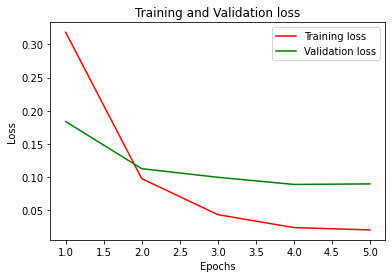

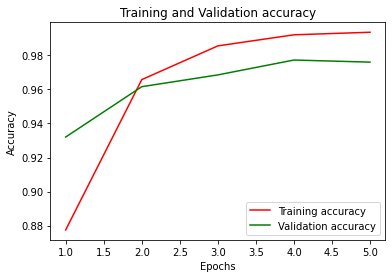

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11709
           1       0.93      0.91      0.92      2021

    accuracy                           0.98     13730
   macro avg       0.96      0.95      0.95     13730
weighted avg       0.98      0.98      0.98     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['hypocrisy'], epochs=5, validation_data=(XTest_seq, YTest['hypocrisy']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['hypocrisy'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['hypocrisy'], YPred))

Warning

Epoch 1/5
644/644 [==============================] - 736s 1s/step - loss: 0.2808 - accuracy: 0.9076 - val_loss: 0.1547 - val_accuracy: 0.9464
Epoch 2/5
644/644 [==============================] - 738s 1s/step - loss: 0.0937 - accuracy: 0.9682 - val_loss: 0.0921 - val_accuracy: 0.9696
Epoch 3/5
644/644 [==============================] - 737s 1s/step - loss: 0.0445 - accuracy: 0.9852 - val_loss: 0.0801 - val_accuracy: 0.9750
Epoch 4/5
644/644 [==============================] - 735s 1s/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0730 - val_accuracy: 0.9779
Epoch 5/5
644/644 [==============================] - 737s 1s/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.0823 - val_accuracy: 0.9779

Final training loss 	 0.018243499100208282
Final training accuracy  0.9939790964126587 

430/430 [==============================] - 68s 158ms/step - loss: 0.0823 - accuracy: 0.9779

Testing loss  	 0.08225327730178833
Testing accuracy  0.9778587222099304


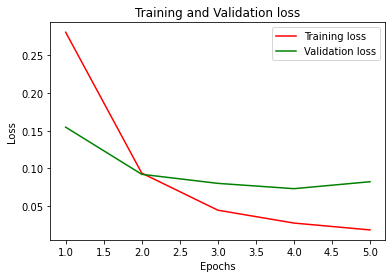

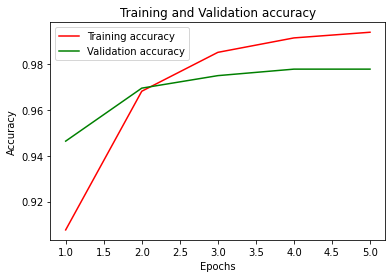

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12271
           1       0.96      0.83      0.89      1459

    accuracy                           0.98     13730
   macro avg       0.97      0.91      0.94     13730
weighted avg       0.98      0.98      0.98     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['warning'], epochs=5, validation_data=(XTest_seq, YTest['warning']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['warning'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['warning'], YPred))

Affiliation

Epoch 1/5
644/644 [==============================] - 740s 1s/step - loss: 0.2492 - accuracy: 0.9192 - val_loss: 0.1449 - val_accuracy: 0.9457
Epoch 2/5
644/644 [==============================] - 736s 1s/step - loss: 0.0824 - accuracy: 0.9708 - val_loss: 0.0734 - val_accuracy: 0.9773
Epoch 3/5
644/644 [==============================] - 735s 1s/step - loss: 0.0312 - accuracy: 0.9890 - val_loss: 0.0505 - val_accuracy: 0.9845
Epoch 4/5
644/644 [==============================] - 735s 1s/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0509 - val_accuracy: 0.9848
Epoch 5/5
644/644 [==============================] - 736s 1s/step - loss: 0.0119 - accuracy: 0.9960 - val_loss: 0.0536 - val_accuracy: 0.9852

Final training loss 	 0.011882156133651733
Final training accuracy  0.9959698915481567 

430/430 [==============================] - 67s 157ms/step - loss: 0.0536 - accuracy: 0.9852

Testing loss  	 0.053568653762340546
Testing accuracy  0.9852148294448853


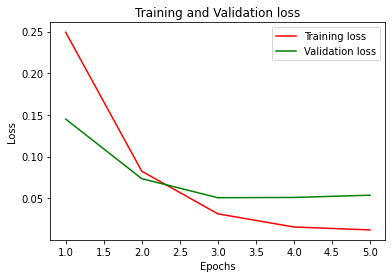

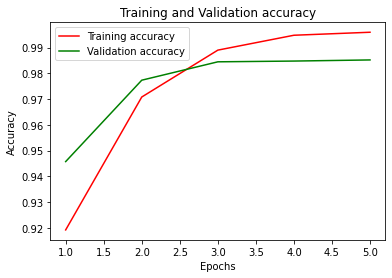

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12612
           1       0.97      0.85      0.90      1118

    accuracy                           0.99     13730
   macro avg       0.98      0.92      0.95     13730
weighted avg       0.99      0.99      0.98     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['affiliation'], epochs=5, validation_data=(XTest_seq, YTest['affiliation']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['affiliation'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['affiliation'], YPred))

Denouncing

Epoch 1/5
644/644 [==============================] - 740s 1s/step - loss: 0.1586 - accuracy: 0.9398 - val_loss: 0.1718 - val_accuracy: 0.9373
Epoch 2/5
644/644 [==============================] - 740s 1s/step - loss: 0.0816 - accuracy: 0.9701 - val_loss: 0.1527 - val_accuracy: 0.9470
Epoch 3/5
644/644 [==============================] - 741s 1s/step - loss: 0.0534 - accuracy: 0.9809 - val_loss: 0.1298 - val_accuracy: 0.9593
Epoch 4/5
644/644 [==============================] - 743s 1s/step - loss: 0.0399 - accuracy: 0.9859 - val_loss: 0.1357 - val_accuracy: 0.9582
Epoch 5/5
644/644 [==============================] - 743s 1s/step - loss: 0.0319 - accuracy: 0.9879 - val_loss: 0.1522 - val_accuracy: 0.9527

Final training loss 	 0.03193075209856033
Final training accuracy  0.9879096746444702 

430/430 [==============================] - 68s 157ms/step - loss: 0.1522 - accuracy: 0.9527

Testing loss  	 0.1521659642457962
Testing accuracy  0.9527312517166138


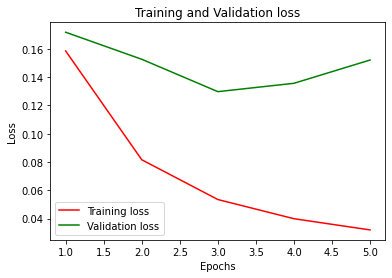

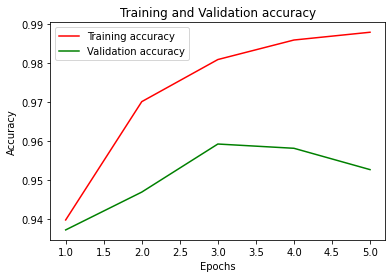

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     11045
           1       0.86      0.91      0.88      2685

    accuracy                           0.95     13730
   macro avg       0.92      0.94      0.93     13730
weighted avg       0.95      0.95      0.95     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['denouncing'], epochs=5, validation_data=(XTest_seq, YTest['denouncing']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['denouncing'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['denouncing'], YPred))

Humor

Epoch 1/5
644/644 [==============================] - 743s 1s/step - loss: 0.4178 - accuracy: 0.8521 - val_loss: 0.2424 - val_accuracy: 0.9116
Epoch 2/5
644/644 [==============================] - 740s 1s/step - loss: 0.1494 - accuracy: 0.9470 - val_loss: 0.1324 - val_accuracy: 0.9529
Epoch 3/5
644/644 [==============================] - 739s 1s/step - loss: 0.0699 - accuracy: 0.9753 - val_loss: 0.1094 - val_accuracy: 0.9640
Epoch 4/5
644/644 [==============================] - 739s 1s/step - loss: 0.0419 - accuracy: 0.9865 - val_loss: 0.0922 - val_accuracy: 0.9699
Epoch 5/5
644/644 [==============================] - 743s 1s/step - loss: 0.0298 - accuracy: 0.9899 - val_loss: 0.0847 - val_accuracy: 0.9730

Final training loss 	 0.02983775921165943
Final training accuracy  0.9898518919944763 

430/430 [==============================] - 68s 158ms/step - loss: 0.0847 - accuracy: 0.9730

Testing loss  	 0.0847139060497284
Testing accuracy  0.9729788899421692


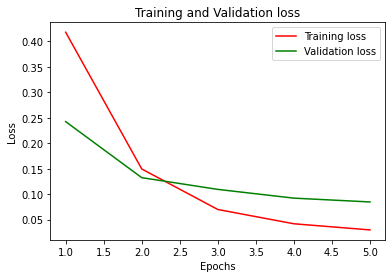

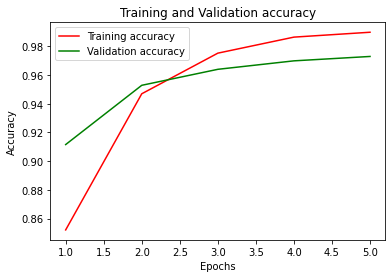

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11524
           1       0.92      0.91      0.92      2206

    accuracy                           0.97     13730
   macro avg       0.95      0.95      0.95     13730
weighted avg       0.97      0.97      0.97     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['humor'], epochs=5, validation_data=(XTest_seq, YTest['humor']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['humor'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['humor'], YPred))

Positive Tone

Epoch 1/5
644/644 [==============================] - 802s 1s/step - loss: 0.3326 - accuracy: 0.8806 - val_loss: 0.1755 - val_accuracy: 0.9344
Epoch 2/5
644/644 [==============================] - 782s 1s/step - loss: 0.1017 - accuracy: 0.9630 - val_loss: 0.1118 - val_accuracy: 0.9614
Epoch 3/5
644/644 [==============================] - 784s 1s/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.1016 - val_accuracy: 0.9681
Epoch 4/5
644/644 [==============================] - 787s 1s/step - loss: 0.0278 - accuracy: 0.9896 - val_loss: 0.0825 - val_accuracy: 0.9741
Epoch 5/5
644/644 [==============================] - 787s 1s/step - loss: 0.0205 - accuracy: 0.9927 - val_loss: 0.0817 - val_accuracy: 0.9750

Final training loss 	 0.022500569000840187
Final training accuracy  0.9921340346336365 

430/430 [==============================] - 68s 158ms/step - loss: 0.0817 - accuracy: 0.9750

Testing loss  	 0.08173666894435883
Testing accuracy  0.9750182032585144


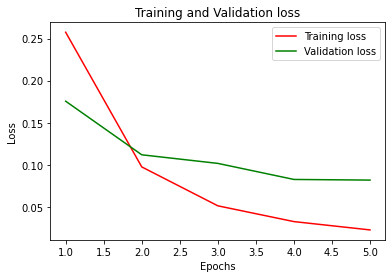

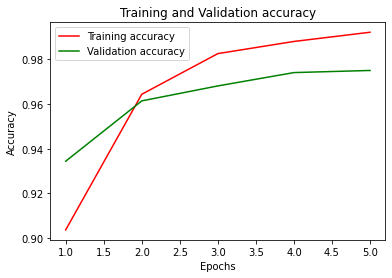

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11993
           1       0.90      0.90      0.90      1737

    accuracy                           0.98     13730
   macro avg       0.94      0.94      0.94     13730
weighted avg       0.98      0.98      0.98     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['positive_tone'], epochs=5, validation_data=(XTest_seq, YTest['positive_tone']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['positive_tone'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['positive_tone'], YPred))

Hostile Language

Epoch 1/5
644/644 [==============================] - 789s 1s/step - loss: 0.4789 - accuracy: 0.7866 - val_loss: 0.2804 - val_accuracy: 0.8873
Epoch 2/5
644/644 [==============================] - 785s 1s/step - loss: 0.1836 - accuracy: 0.9297 - val_loss: 0.2151 - val_accuracy: 0.9151
Epoch 3/5
644/644 [==============================] - 794s 1s/step - loss: 0.1111 - accuracy: 0.9548 - val_loss: 0.1730 - val_accuracy: 0.9344
Epoch 4/5
644/644 [==============================] - 796s 1s/step - loss: 0.0739 - accuracy: 0.9703 - val_loss: 0.1735 - val_accuracy: 0.9388
Epoch 5/5
644/644 [==============================] - 790s 1s/step - loss: 0.0543 - accuracy: 0.9780 - val_loss: 0.1665 - val_accuracy: 0.9417

Final training loss 	 0.05426902323961258
Final training accuracy  0.9780043959617615 

430/430 [==============================] - 69s 160ms/step - loss: 0.1665 - accuracy: 0.9417

Testing loss  	 0.16647104918956757
Testing accuracy  0.9417334198951721


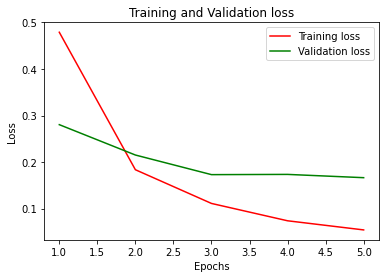

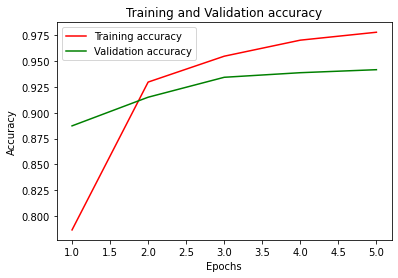

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8235
           1       0.92      0.94      0.93      5495

    accuracy                           0.94     13730
   macro avg       0.94      0.94      0.94     13730
weighted avg       0.94      0.94      0.94     13730



In [ ]:
history = model.fit(XTrain_seq, YTrain['hostile_language'], epochs=5, validation_data=(XTest_seq, YTest['hostile_language']))

print('\nFinal training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['accuracy'][-1], '\n')

testLoss, testAccuracy = model.evaluate(XTest_seq, YTest['hostile_language'])

print('\nTesting loss  \t', testLoss)
print('Testing accuracy ', testAccuracy)

# plotting training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
mplot.plot(epochs, loss, color='red', label='Training loss')
mplot.plot(epochs, val_loss, color='green', label='Validation loss')
mplot.title('Training and Validation loss')
mplot.xlabel('Epochs')
mplot.ylabel('Loss')
mplot.legend()
mplot.show()

# plotting training and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
mplot.plot(epochs, acc, color='red', label='Training accuracy')
mplot.plot(epochs, val_acc, color='green', label='Validation accuracy')
mplot.title('Training and Validation accuracy')
mplot.xlabel('Epochs')
mplot.ylabel('Accuracy')
mplot.legend()
mplot.legend()
mplot.show()

YPred = model.predict(XTest_seq)
for i in range(len(YPred)):
  if(YPred[i] > 0.5):
    YPred[i] = 1
  else:
    YPred[i] = 0

print(classification_report(YTest['hostile_language'], YPred))